# Пример лабораторной работы #1: Использование регрессии в scikit-learn

В данном документе детально разобран пример, связанный с решением задачи регрессии для данных задачи "Facebook Metrics" из набора данных UCI Machine Learning datasets, который расположен по сслыке:
https://archive.ics.uci.edu/ml/datasets/Facebook+metrics


## Первичная обработка данных и использование линейной регрессии

**Задача 1. Задача состоит в том, чтобы загрузить данные из csv файла, подготовить их для использования в scikit-learn и применить линейную регрессию (LinearRegression).**

1.1. Загрузить данные из csv файла;

1.2. Выполнить их предобработку (удалить отсутствующие значения, преобразовать категориальные переменные и т.д.);

1.3. Преобразовать в матричную и векторную формы;

1.4. Применить линейную регрессию, посчитать метрики (MAE, MSE, RMSE, R^2);

1.5. Применить метод перекрестного тестирования и получить метрики при кросс-валидации.

**ОПИСАТЬ ВАШУ ЗАДАЧУ**

После разархивирования исходного файла необходимо "подтянуть" данные из .csv файла.


In [75]:
import pandas as pd
import numpy as np
# В качестве параметра передаем имя файла и разделитель - символ, которым проводится разбиение данных в файле
inputData = pd.read_csv('dataset_Facebook.csv', delimiter=';')

In [76]:
# Взглянем на таблицу
inputData

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


Мы хотим предсказать на основании признаков число взаимодействий (чему соответствует параметр Total Interactions).
*Опишите Вашу целевую переменную*

In [77]:
# Имя столбца с целевой переменной
targetColumn = 'Total Interactions'

# Получим имена всех столбцов и удалим оттуда целевой столбец
FeatureColumns = inputData.columns.tolist()
FeatureColumns.remove(targetColumn)

В таблице могут содержаться пропущенные значения. Проверим, есть ли они в наших данных и есои есть, то сколько их:

In [78]:
print("Null values: {0}".format(inputData.isnull().values.any()))
print("Count of NaN values: {0}".format(np.sum(inputData.isnull().values)))



Null values: True
Count of NaN values: 6


Итак, мы видим, что пропущенные значения есть. Если их достаточно мало, мы можем просто отбросить их. 

In [79]:
# Отбрасываем все строки с пропущенными значениями
inputData = inputData.dropna(axis=0)

inputData

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


Следующая проблема, с которой мы столкнемся при работе с реальными данными - это нечисловые данные (категориальные), которые нам нужно преобразовать к числовым.
Посмотрим на типы столбцов, которые присутствуют в нашей таблице:

In [80]:
inputData.dtypes

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

Итак, как можно заметить, столбцу Type соответствует тип object, и это означает что pandas считает его некоторым объектным типом (который в т.ч. соответствует категориальным переменным).

Одним из способов работы с категориальными типами в Python является **бинаризация**. В процессе бинаризации, в таблицу вводятся новые столбцы. Количество новых столбцов соответствует количеству значений категориальной переменной. 

Соответственно, значением является $1$, если категориальная переменная (для текущего примера) приняла это соответствующая значение, и $0$ в противном случае.

В Pandas для выполнения бинаризации используется функция:
    get_dummies
На вход функции передаются исходные данные и имена столбцов, подлежащих бинаризации.

In [81]:
pd.get_dummies(inputData, columns=['Type'])

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video
0,139441,2,12,4,3,0.0,2752,5091,178,109,...,1640,119,4,79.0,17.0,100,0.0,1.0,0.0,0.0
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,...,6112,1108,5,130.0,29.0,164,0.0,0.0,1.0,0.0
2,139441,3,12,3,3,0.0,2413,4373,177,113,...,1503,132,0,66.0,14.0,80,0.0,1.0,0.0,0.0
3,139441,2,12,2,10,1.0,50128,87991,2211,790,...,32048,1386,58,1572.0,147.0,1777,0.0,1.0,0.0,0.0
4,139441,2,12,2,3,0.0,7244,13594,671,410,...,3200,396,19,325.0,49.0,393,0.0,1.0,0.0,0.0
5,139441,2,12,1,9,0.0,10472,20849,1191,1073,...,7852,1016,1,152.0,33.0,186,0.0,0.0,1.0,0.0
6,139441,3,12,1,3,1.0,11692,19479,481,265,...,9328,379,3,249.0,27.0,279,0.0,1.0,0.0,0.0
7,139441,3,12,7,9,1.0,13720,24137,537,232,...,11056,422,0,325.0,14.0,339,0.0,1.0,0.0,0.0
8,139441,2,12,7,3,0.0,11844,22538,1530,1407,...,7912,1250,0,161.0,31.0,192,0.0,0.0,1.0,0.0
9,139441,3,12,6,10,0.0,4694,8668,280,183,...,2324,199,3,113.0,26.0,142,0.0,1.0,0.0,0.0


Как можно заметить, в таблице отсутствует исходный столбец Type, но вместо него появились следующие столбцы: Type_Link,	Type_Photo,	Type_Status, Type_Video.
Значения категориальной переменной Type были Link, Photo, Status, Video (соответствующие типу поста в FB).

Продолжим работу с обработанными данными. Теперь мы наконец можем использовать наши исходные данные для анализа данных. Будем использовать уже привычные нам обозначения $X$ - для матрицы атрибутов данных и $y$ для вектора значений целевой переменной.

In [83]:
inputData =  pd.get_dummies(inputData, columns=['Type'])

In [105]:
# Имя столбца с целевой переменной
targetColumn = 'Total Interactions'

# Получим имена всех столбцов и удалим оттуда целевой столбец
FeatureColumns = inputData.columns.tolist()
FeatureColumns.remove(targetColumn)

X = inputData[FeatureColumns].values
y = inputData[targetColumn].values

Для начала попробуем использовать стандартную линейную регрессию из пакета scikit-learn.

Ссылка на детальное описание: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Ссылка на еще одно объяснение: http://scikit-learn.org/stable/modules/linear_model.html

In [106]:
# Сначала импортируем класс, реализующий линейную регрессию
from sklearn.linear_model import LinearRegression

# После чего создадим объект класса и выполним подгон данных по всей выборке
lr = LinearRegression()

lr.fit(X,y) # Подгон данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

После получения линейной регрессии, мы можем посмотреть коэффициенты и смещение:

In [107]:
print("Intercept: ", lr.intercept_)
print("Coefficients: ", lr.coef_)

Intercept:  -8.6970430857e-12
Coefficients:  [  4.75096245e-18   1.40431720e-13  -1.86239912e-14   1.11473331e-13
   3.70536934e-14   7.11375403e-14   1.11022302e-16   1.11022302e-16
  -1.55431223e-15   9.43689571e-16  -5.55111512e-17   1.11022302e-16
   5.55111512e-17   1.05471187e-15   1.00000000e+00   1.00000000e+00
   1.00000000e+00  -1.21250666e-14   1.39302632e-14  -3.64521781e-14
   3.46487162e-14]


Также, возпользовавшись стандартными функциями из пакета scikit-learn, посчитаем метрики:


In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Получим вектор "предсказаний"
y_predict = lr.predict(X)
# В функцию передается истинное значение вектора ответов и предсказанное нашей регрессионной функцией:
test_mae_error = mean_absolute_error(y, y_predict)
test_mse_error = mean_squared_error(y, y_predict)
test_r2_error = r2_score(y, y_predict)
print("MAE : {0}".format(test_mae_error))
print("MSE : {0}".format(test_mse_error))
print("R^2 coefficient : {0}".format(test_r2_error))

MAE : 7.181265870103933e-12
MSE : 2.7272293820654795e-22
R^2 coefficient : 1.0


Выглядит неплохо, но в то же время, эти цифры **ничего не могут сказать нам о качестве регрессии**. Одна из основных практических целей машинного обучения - предсказывать новые значения, на основе старых данных.

Т.е. важна **обобщающая способность алгоритма**. По одним только тестовым данным нельзя ничего сказать об обобщающей способности алгоритма машинного обучения.

На лекции уже был рассмотрен метод перекрестной проверки. В scikit-learn его достаточно просто можно использовать, если взять объект 
    KFold
входящий в состав scikit-learn.

Разделим данные на 5 фолдов и укажем, что необходимо предварительно перемещать данные (параметр shuffle).

In [109]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

Теперь можем использовать перекрестную проверку:

In [110]:
MAE_list_scores = []
MSE_list_scores = []
R2_list_scores = []

iteration_index = 0

# Разделение на тестовую и тренировочную выборки
for train_indexes, test_indexes in kf.split(X,y):
    iteration_index+=1
    # X_train, y_train - данные, соответствующие обучающей выборке
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    # X_test, y_test - данные, соответствующие тренировочной выборке
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    lr.fit(X_train, y_train) # Обучение на тестовых данных
    y_predict = lr.predict(X_test)
    
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_r2 = r2_score(y_test, y_predict)
    print("Iteration #{0}: MAE : {1}, MSE : {2}, R2 : {3}".format(iteration_index, current_mae, current_mse, current_r2))
    MAE_list_scores.append(current_mae)
    MSE_list_scores.append(current_mse)
    R2_list_scores.append(current_r2)

# Выведем средние значения:
print("\nOverall: ")
print("\tMAE : {0}".format(np.mean(MAE_list_scores)))
print("\tMSE : {0}".format(np.mean(MSE_list_scores)))
print("\tR^2 coefficient : {0}".format(np.mean(R2_list_scores)))

Iteration #1: MAE : 7.70556629571086e-12, MSE : 1.0016722006473284e-22, R2 : 1.0
Iteration #2: MAE : 2.858690986002208e-12, MSE : 1.1490039587107852e-23, R2 : 1.0
Iteration #3: MAE : 2.7229397188200508e-12, MSE : 2.0802718526315402e-23, R2 : 1.0
Iteration #4: MAE : 1.6631724056332123e-12, MSE : 7.116257682998914e-24, R2 : 1.0
Iteration #5: MAE : 8.682431836358621e-12, MSE : 1.5006409947322158e-21, R2 : 1.0

Overall: 
	MAE : 4.726560248504991e-12
	MSE : 3.2804344611867417e-22
	R^2 coefficient : 1.0


Посмотрим ошибку MSE регрессии, обученной на тестовой выборке и в результате перекрестной проверки:

In [116]:
test_mse_error < np.mean(MSE_list_scores)

True

Ожидаемо, MSE ошибка при обучении на всех данных оказалась меньше, чем на данных, при разбиении на тестовую и тренировочные данные.
Но теперь, у нас есть некоторая степень уверенность в том, что алгоритм обладает какой-то обобщающей способностью (насколько хорошей или плохой - другой вопрос).

** Задача 2. Полиномиальная регрессия **

2.1. Применить полиномиальную регрессию и определить границы переобучения, т.е. при какой степени полиномиальной регрессии мы начинаем переобучаться?
Привести значения степени, значения метрик для рассмотренных степеней и весовые коэффициенты регрессии (оптимальной степени).

Для построение полиномиальных атрибутов для регрессии используется класс 
    PolynomialFeatures
описание класса можно найти здесь: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [137]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degreeList = []
maeList = []
mseList = []

kf = KFold(n_splits=3, shuffle=True)

for count, degree in enumerate(range(0,3)):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    MAE_for_current_degree = []
    MSE_for_current_degree = []
    
    for train_indexes, test_indexes in kf.split(X,y):
        # X_train, y_train - данные, соответствующие обучающей выборке
        X_train = X[train_indexes]
        y_train = y[train_indexes]
    
        # X_test, y_test - данные, соответствующие тренировочной выборке
        X_test = X[test_indexes]
        y_test = y[test_indexes]
    
        model.fit(X_train, y_train) # Обучение на тестовых данных
        y_predict = model.predict(X_test)
        
        current_mae = mean_absolute_error(y_test, y_predict)
        current_mse = mean_squared_error(y_test, y_predict)
        
        MAE_for_current_degree.append(current_mae)
        MSE_for_current_degree.append(current_mse)
    
    print("Degree: {0}".format(degree))
    print("\tMAE : {0}".format(np.mean(MAE_for_current_degree)))
    print("\tMSE : {0}".format(np.mean(MSE_for_current_degree)))
    degreeList.append(degree)
    maeList.append(np.mean(MAE_for_current_degree))
    mseList.append(np.mean(MSE_for_current_degree))

Degree: 0
	MAE : 166.65717783899603
	MSE : 145543.27218243037
Degree: 1
	MAE : 5.0297082857762746e-12
	MSE : 3.1304087100659884e-22
Degree: 2
	MAE : 1.4443802650325839
	MSE : 337.84821215039244


In [138]:
import matplotlib.pyplot as plt
%matplotlib inline


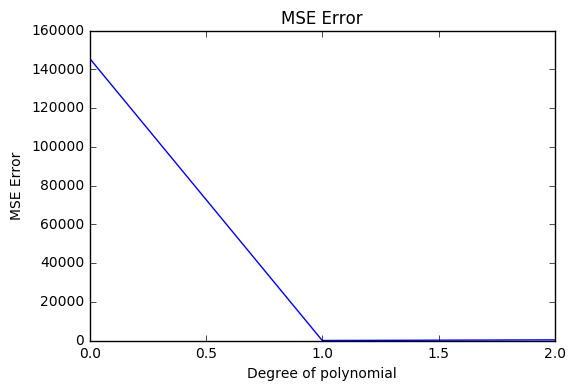

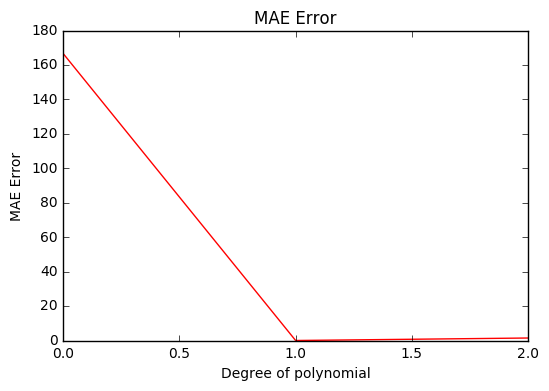

In [139]:
plt.plot(degreeList, mseList, 'b-', label='MSE')
plt.title('MSE Error')
plt.ylabel('MSE Error')
plt.xlabel('Degree of polynomial')
plt.show()

plt.plot(degreeList, maeList, 'r', label='MAE')
plt.title('MAE Error')
plt.ylabel('MAE Error')
plt.xlabel('Degree of polynomial')
plt.show()


Как можно увидеть из приведенных выше цифр, уже на второй степени полиномиальной регрессии наблюдается рост MSE ошибки, после третьей степени мы наблюдаем "взрывной" (экспоненциальный) рост.

In [152]:
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
model.fit(X_train, y_train) # Обучение на тестовых данных
y_predict = model.predict(X_test)

Теперь получим значения коэффициентов:

In [154]:
print("Coefficients: {0}".format((model.get_params()['linearregression']).coef_))
print("Intercept: {0}".format((model.get_params()['linearregression']).intercept_ ))

Coefficients: [  0.00000000e+00   1.08420217e-16   6.19912108e-14  -1.30681924e-13
   3.79488108e-14  -3.83026943e-15   2.70700129e-13  -4.16333634e-17
   1.11022302e-16   2.55351296e-15   2.33146835e-15   4.16333634e-17
   1.38777878e-17   2.49800181e-16  -7.49400542e-15   1.00000000e+00
   1.00000000e+00   1.00000000e+00  -1.04340127e-14   3.04617442e-15
  -4.53560800e-14   5.27514840e-14]
Intercept: -1.708144736767281e-11


## $L_1$ и $L_2$ регрессия

**Задача 3. Применить и сравнить $L_1$ и $L_2$ регрессии с оптимальным значением степени, полученной в результате выполнения задачи 2. Получить метрики: MAE, MSE, RMSE и значения весовых коэффициентов.** 

Теперь, когда нам удалось выяснить границы переобучаемости для полиномиальной регрессии, попробуем применить различные типы регрессии к нашим данным.

Начнем рассмотрение $L_2$ регрессии (ридж-регрессии) с параметрами по умолчанию.

Регрессия в scikit-learn реализуется в сл. модулях:
    sklearn.linear_model.Ridge ( http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn-linear-model-ridge )
    sklearn.linear_model.Lasso ( http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso )

In [211]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Мы выяснили, что оптимальным значением степени для полиномиальной регрессии является 1, поэтому укажем её.
optimalDegree = 1

# Будем использовать параметры по умолчанию, т.е. на данный момент не укажем значение alpha
model = make_pipeline(PolynomialFeatures(1), Ridge())
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []

for train_indexes, test_indexes in kf.split(X,y):
    # X_train, y_train - данные, соответствующие обучающей выборке
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    # X_test, y_test - данные, соответствующие тренировочной выборке
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) # Обучение на тестовых данных
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    

print("Coefficients: {0}".format((model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((model.get_params()['ridge']).intercept_ ))

	MAE : 0.0001715630599128251
	MSE : 3.1623917325415694e-07
Coefficients: [  0.00000000e+00   1.94815074e-09  -5.80472325e-05  -1.95658395e-05
  -1.34729551e-06   3.43747508e-06  -9.30392428e-06   1.55512485e-09
   8.06942774e-11  -5.87114462e-07   5.81030955e-07   1.47015616e-08
   4.76060245e-10  -2.10807433e-08   3.14711559e-09   9.99979954e-01
   1.00000220e+00   9.99996980e-01  -4.17175309e-05  -9.05200590e-05
   5.61527482e-05   7.60848382e-05]
Intercept: 6.914580478678545e-05


** Сравните и объясните полученные значения MSE и весовых коэффициентов $L_2$-регрессии со значениями линейной регрессии**

Теперь рассмотрим $L_1$ регрессию (с параметрами по умолчанию).

In [189]:
model = make_pipeline(PolynomialFeatures(1), Lasso())
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []

for train_indexes, test_indexes in kf.split(X,y):
    # X_train, y_train - данные, соответствующие обучающей выборке
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    # X_test, y_test - данные, соответствующие тренировочной выборке
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) # Обучение на тестовых данных
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    

print("Coefficients: {0}".format((model.get_params()['lasso']).coef_))
print("Intercept: {0}".format((model.get_params()['lasso']).intercept_ ))

	MAE : 1.5676479984289908
	MSE : 10.583156319308255
Coefficients: [  0.00000000e+00  -1.53239172e-05  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   0.00000000e+00   3.07787620e-06
  -3.08969531e-06   5.32897860e-02  -5.33520561e-02   2.41252349e-04
   7.29574053e-06  -8.86890328e-05   1.90298554e-03   1.02830199e+00
   9.49688636e-01   1.06796812e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00]
Intercept: 1.428454359926178


Вопросы:

** Сравните и объясните полученные значения MSE и весовых коэффициентов $L_1$-регрессии со значениями линейной регрессии**

** Какие значения были отброшены моделью, в процессе $L_1$-регуляризации? **

** Сравните и объясните полученные значения MSE и весовых коэффициентов $L_1$-регрессии со значениями $L_2$-регрессии**

** Что лучше использовать для данной задачи: $L_1$ или $L_2$ регрессию?**

### Подбор гиперпараметра в задаче регрессии

** Задача 4. Подобрать гиперпараметры для $L_2$ и $L_1$ регрессии. Получить значения метрик MAE, MSE, RMSE и весовых коэффициентов для оптимального параметра. Объяснить полученные результаты.**

Одним из самых простых способов подбора гиперпараметра в scikit-learn является использование класса 
    GridSearchCV
назначение которого - перебор параметров (переданных ему) для классификатора\регрессора.

Подробнее о классе GridSearchCV можно прочитать по ссылке: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

Исходя из названия, можно провести аналогию с сеткой - на сетке размещаются всевозможные значения гиперпараметров, и классификатор\регрессор тестируется в каждом узле. 

Стоит отметить, что
    GridSearchCV 
базово проводит оптимизацию, вызывая метод score() классификатора\регрессора. В то же время, если взглянуть в документацию Ridge\Lasso (например, http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge ) мы увидим, что метод score() возвращает коэффициент детерминации $R^2$.

Поскольку, мы хотим провести оптимизацию по метрикам MSE\MAE, то необходимо **явно** передавать функцию, на основании которой проводится оптимизация.

Для этого преднаначена функция
    make_scorer
из пакета scikit-learn. Документация: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer 

В функцию передается по какому параметру мы хотим оптимизировать (можно взять уже рассмотренные 
    mean_squared_error
и
    mean_absolute_error
А также передается значение параметра 
    greater_is_better
. Как ясно из названия, "больше значит лучше" - параметр говорит о том, хотим как мы хотим оптимизировать значения параметра - максимизировать ( и тогда
    greater_is_better=True
) или минимизировать (и тогда
    greater_is_better=False
). Рассмотрим на примере MAE (MSE сделать самостоятельно).

In [3]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

MAE_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
MSE_scorer = make_scorer(mean_squared_error, greater_is_better=False)

NameError: name 'mean_absolute_error' is not defined

Теперь можем задать набор значений, которые мы хотим оптимизировать. Поскольку, значения $alpha$ как правило выбираются соответственно степени, используется функция 
    np.logspace
, которая возвращает числа, распределенные на логарифмической шкале. Последовательность (в нашем случае) начинается с $10^{-10}$ и равномерно распределена до $10^2$. Берется $200$ значений.

In [196]:
n_alphas = 200 # 200 значений
alphas = np.logspace(-10, 2, n_alphas)
alphas

array([  1.00000000e-10,   1.14895100e-10,   1.32008840e-10,
         1.51671689e-10,   1.74263339e-10,   2.00220037e-10,
         2.30043012e-10,   2.64308149e-10,   3.03677112e-10,
         3.48910121e-10,   4.00880633e-10,   4.60592204e-10,
         5.29197874e-10,   6.08022426e-10,   6.98587975e-10,
         8.02643352e-10,   9.22197882e-10,   1.05956018e-09,
         1.21738273e-09,   1.39871310e-09,   1.60705282e-09,
         1.84642494e-09,   2.12145178e-09,   2.43744415e-09,
         2.80050389e-09,   3.21764175e-09,   3.69691271e-09,
         4.24757155e-09,   4.88025158e-09,   5.60716994e-09,
         6.44236351e-09,   7.40196000e-09,   8.50448934e-09,
         9.77124154e-09,   1.12266777e-08,   1.28989026e-08,
         1.48202071e-08,   1.70276917e-08,   1.95639834e-08,
         2.24780583e-08,   2.58261876e-08,   2.96730241e-08,
         3.40928507e-08,   3.91710149e-08,   4.50055768e-08,
         5.17092024e-08,   5.94113398e-08,   6.82607183e-08,
         7.84282206e-08,

Теперь, в словаре (dictionary) указывается параметр, который мы хотим оптимизировать (в качестве ключа), и множество параметров (в виде списка).

Например,

In [201]:
#parameters = {'alpha':alphas}
parameters = {'alpha': alphas, 'fit_intercept' : [True, False]}

На вход
    GridSearchCV
передается регрессор\классификатор, словарь с параметрами и в качестве параметра 
    scoring
функция оценки.

Прогон по сетке осуществляется с помощью метода fit(). На вход X, y.

Заметим, что нам не нужно заботиться о разбиении на тестовую и тренировочную выборки при переборе параметров по сетке. Поскольку, согласно документации: 

"The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid."

In [202]:
clf = GridSearchCV(Ridge(), parameters, scoring  = MSE_scorer)
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.14895e-10, ...,   8.70359e+01,   1.00000e+02]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

Оптимальные значения можно увидеть, взглянув на атрибут
    best_params_
Значение функции оценки (cost function) на полученных оптимальных параметрах, можно увидеть взглянув на атрибут
    best_score_
Лучший (подобранный) estimator можно получить из атрибута: 
    best_estimator_

In [206]:
clf.best_params_

{'alpha': 1.0595601792776149e-09, 'fit_intercept': False}

In [207]:
clf.best_score_

-3.7456499179090577e-23

In [208]:
clf.best_estimator_

Ridge(alpha=1.0595601792776149e-09, copy_X=True, fit_intercept=False,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [209]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Мы выяснили, что оптимальным значением степени для полиномиальной регрессии является 1, поэтому укажем её.
optimalDegree = 1

# передаем лучший estimator, подобранный с помощью GridSearchCV
model = make_pipeline(PolynomialFeatures(1), clf.best_estimator_)
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []

for train_indexes, test_indexes in kf.split(X,y):
    # X_train, y_train - данные, соответствующие обучающей выборке
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    # X_test, y_test - данные, соответствующие тренировочной выборке
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) # Обучение на тестовых данных
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    

print("Coefficients: {0}".format((model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((model.get_params()['ridge']).intercept_ ))

	MAE : 6.821529618460921e-13
	MSE : 2.1441503218143755e-24
Coefficients: [ -1.14406298e-11   1.26890060e-16   1.30472015e-13  -5.87989854e-13
   3.43423679e-14   6.71609306e-15  -1.78630085e-13  -4.58518909e-17
   1.16414718e-17   1.84878566e-14  -1.66048652e-14   6.74899144e-17
  -1.02452913e-17   4.02723578e-17  -1.72312522e-15   1.00000000e+00
   1.00000000e+00   1.00000000e+00   5.25653640e-13  -4.54594529e-13
  -2.95487062e-13   6.34363615e-13]
Intercept: 0.0


Выше был разобран подбор параметров только для регуляризатора. Теперь рассмотрим как подобрать параметры, если использовался конвейер (как в случае полиномиальной регрессии).

**Задача 4.2 Подбор гиперпараметров для L1 или L2 полиномиальной регрессии (со значением степени полученной из задачи 2). Получить значения метрик MAE, MSE, RMSE и весовых коэффициентов для оптимального параметра. Объяснить полученные результаты.**

Взглянем на модель конвейера:

In [212]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

Видим, что для PolynomialFeatures используется имя polynomialfeatures, для Ridge имя ridge. Параметры в словаре:

In [231]:
parameters = {'ridge__alpha': alphas, 'ridge__fit_intercept' : [True, False]}

Как видим, необходимо вначале написать имя компонента в конвейере, а затем (после двух подчеркиваний) имя настраиваемого параметра.

In [232]:
clf = GridSearchCV(model, parameters, scoring  = MSE_scorer)
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': array([  1.00000e-10,   1.14895e-10, ...,   8.70359e+01,   1.00000e+02]), 'ridge__fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [233]:
clf.best_params_

{'ridge__alpha': 8.0264335222571738e-10, 'ridge__fit_intercept': False}

In [234]:
clf.best_score_

-1.0796080130578772e-23

Ну и теперь, уже знакомым нам методом применим это:

In [224]:
# передаем лучший estimator, подобранный с помощью GridSearchCV
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []
new_model = clf.best_estimator_

for train_indexes, test_indexes in kf.split(X,y):
    # X_train, y_train - данные, соответствующие обучающей выборке
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    # X_test, y_test - данные, соответствующие тренировочной выборке
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    new_model.fit(X_train, y_train) # Обучение на тестовых данных
    y_predict = new_model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
    
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    

print("Coefficients: {0}".format((new_model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((new_model.get_params()['ridge']).intercept_ ))

	MAE : 8.877630901028118e-13
	MSE : 3.589862412338055e-24
Coefficients: [  1.58639981e-03   2.33256898e-17  -4.81018168e-14  -8.31210670e-14
  -2.83880512e-15  -5.38399554e-15  -7.79440191e-14  -6.16017977e-17
   2.24632832e-17  -1.94089889e-14   1.97514551e-14  -1.31552218e-16
  -3.52134099e-17   1.32879112e-16  -5.79484740e-16   1.00000000e+00
   1.00000000e+00   1.00000000e+00  -1.58639981e-03  -1.58639981e-03
  -1.58639981e-03  -1.58639981e-03]
Intercept: 0.0
